In [49]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

## Overview

A place to make plots for AnVIL.

Useful tutorials on Pandas:

* [PythonHow](http://pythonhow.com/accessing-dataframe-columns-rows-and-cells/)

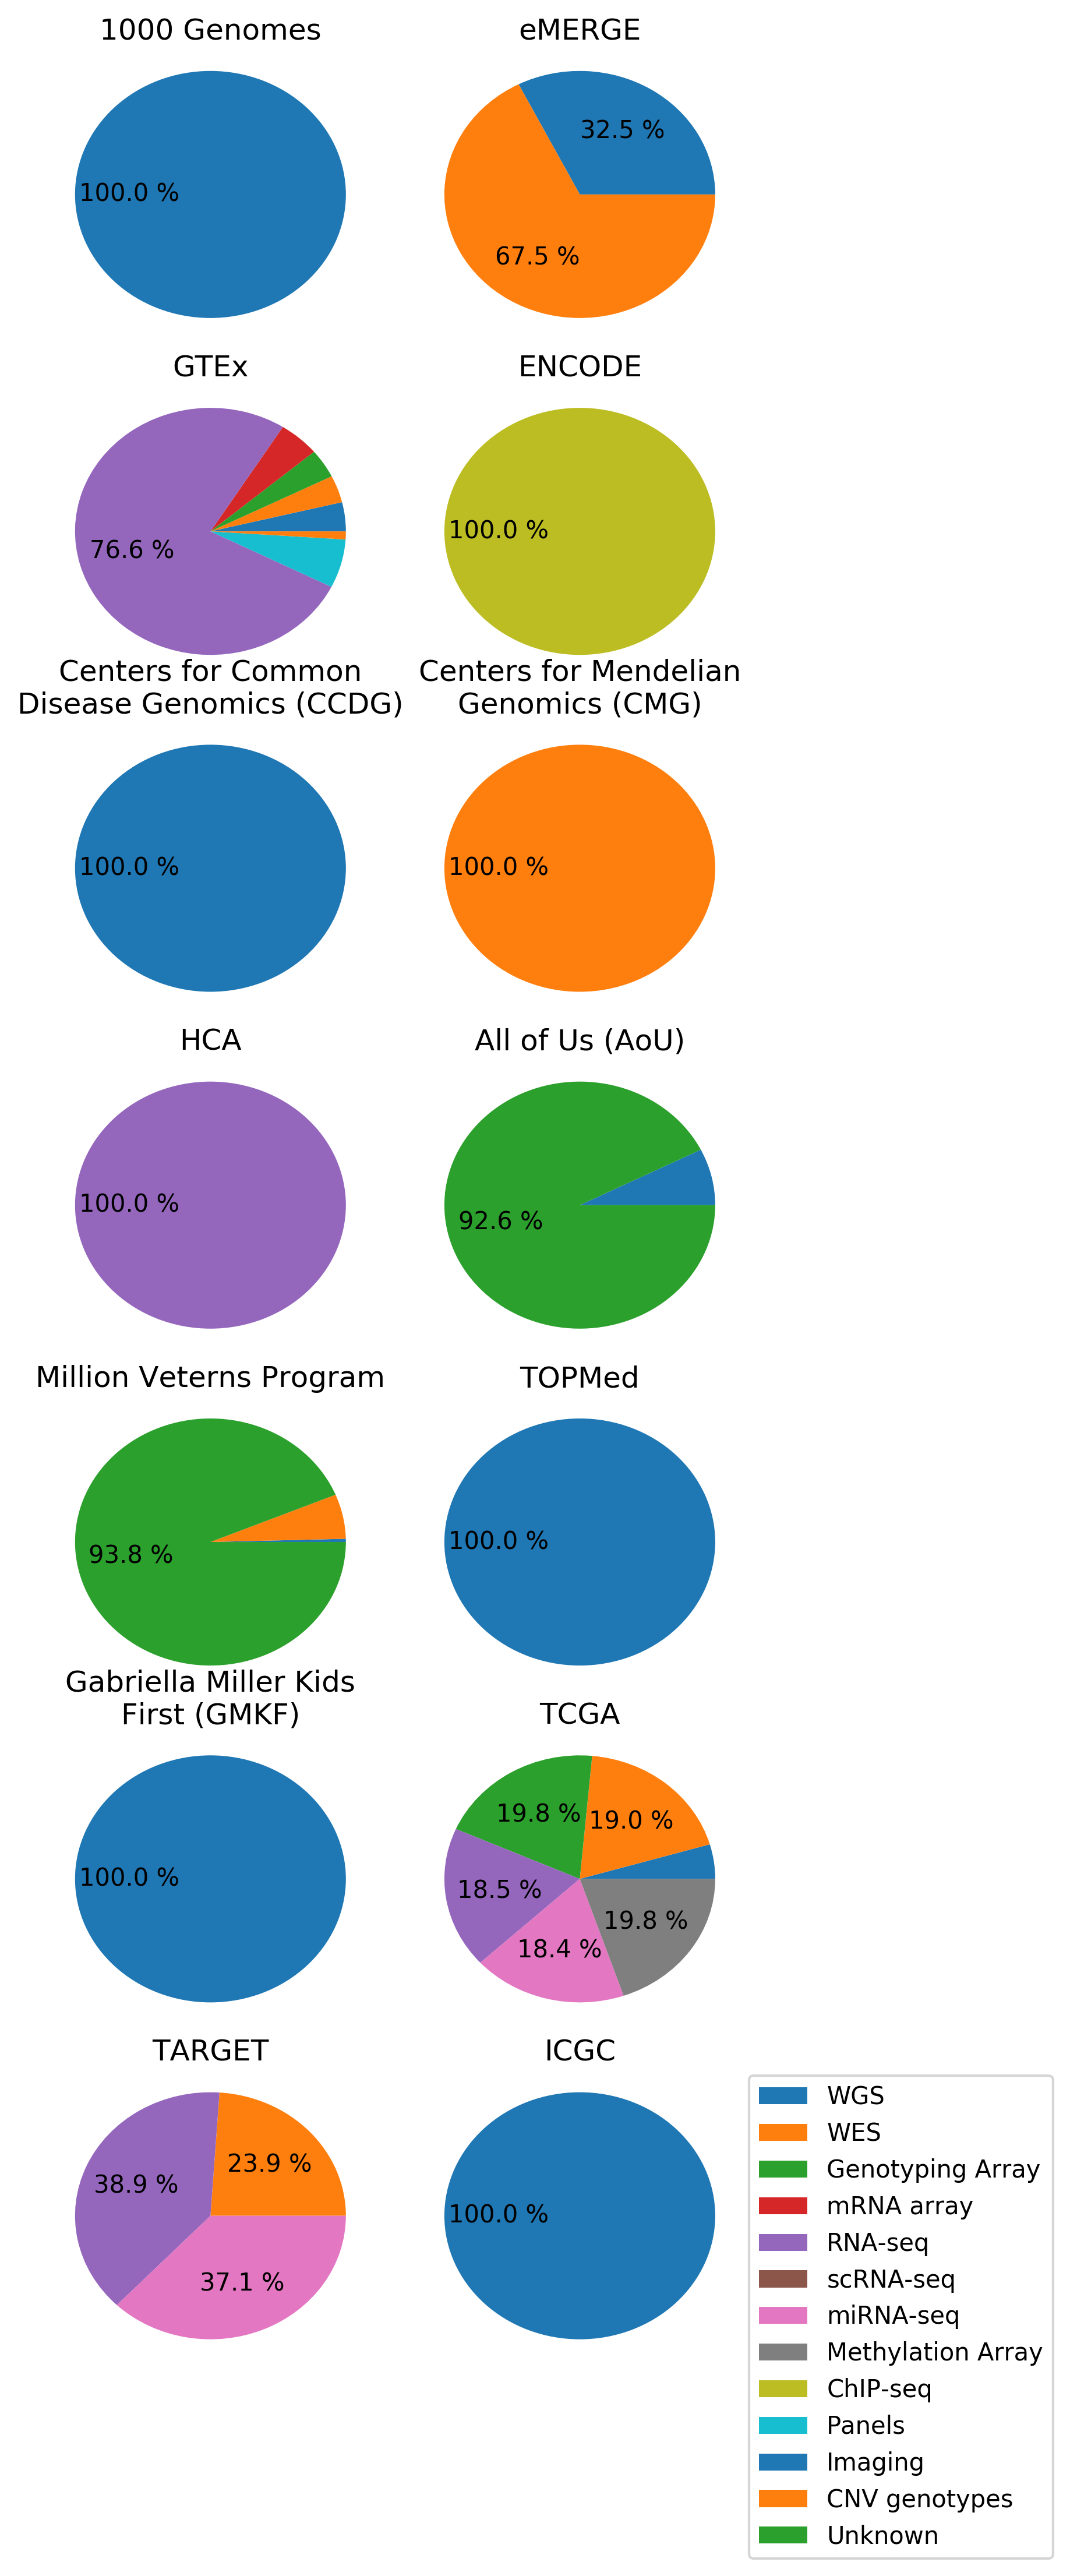

In [73]:
# imports
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import urllib.parse
import urllib.request
import json
import textwrap

# this allows plots to appear directly in the notebook
%matplotlib inline

def my_autopct(pct):
    return ('%.1f %s' % (pct, '%')) if pct > 10 else ''

# Some data

data = pd.read_csv('datasets.tsv', sep='\t')
data = data.set_index("Project")

labels = list(data.columns.values)
labels = labels[0:13]
#print(labels)

projects = list(data.index)
#print(projects)

# Make square figures and axes

# now iterate to make the plots
i = 1
plt.figure(num=1, figsize=(5, 20), dpi=300)
for index, row in data.iterrows():
    fracs = list(row)
    fracs = fracs[0:13]
    
    plt.subplot(8, 2, i) 

    plt.pie(fracs, labels=None, autopct=my_autopct, radius=1.1)
    plt.title(textwrap.fill(index, 25))
    
    
    if (i==14):
        plt.legend(labels=labels, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    
    i = i+1



['1000 Genomes', 'eMERGE', 'GTEx', 'ENCODE', 'Centers for Common Disease Genomics (CCDG)', 'Centers for Mendelian Genomics (CMG)', 'HCA', 'All of Us (AoU) ', 'Million Veterns Program', 'TOPMed', 'Gabriella Miller Kids First (GMKF)', 'TCGA', 'TARGET', 'ICGC']
[  7.12000000e+02   5.15100000e+02   8.18800000e+02   3.81500000e+02
   3.69141000e+04   9.76600000e+02   5.00000000e+04   1.47656000e+04
   1.73630000e+03   1.84570000e+04   9.22850000e+03   1.78990000e+03
   4.03000000e+01   9.22900000e+02]


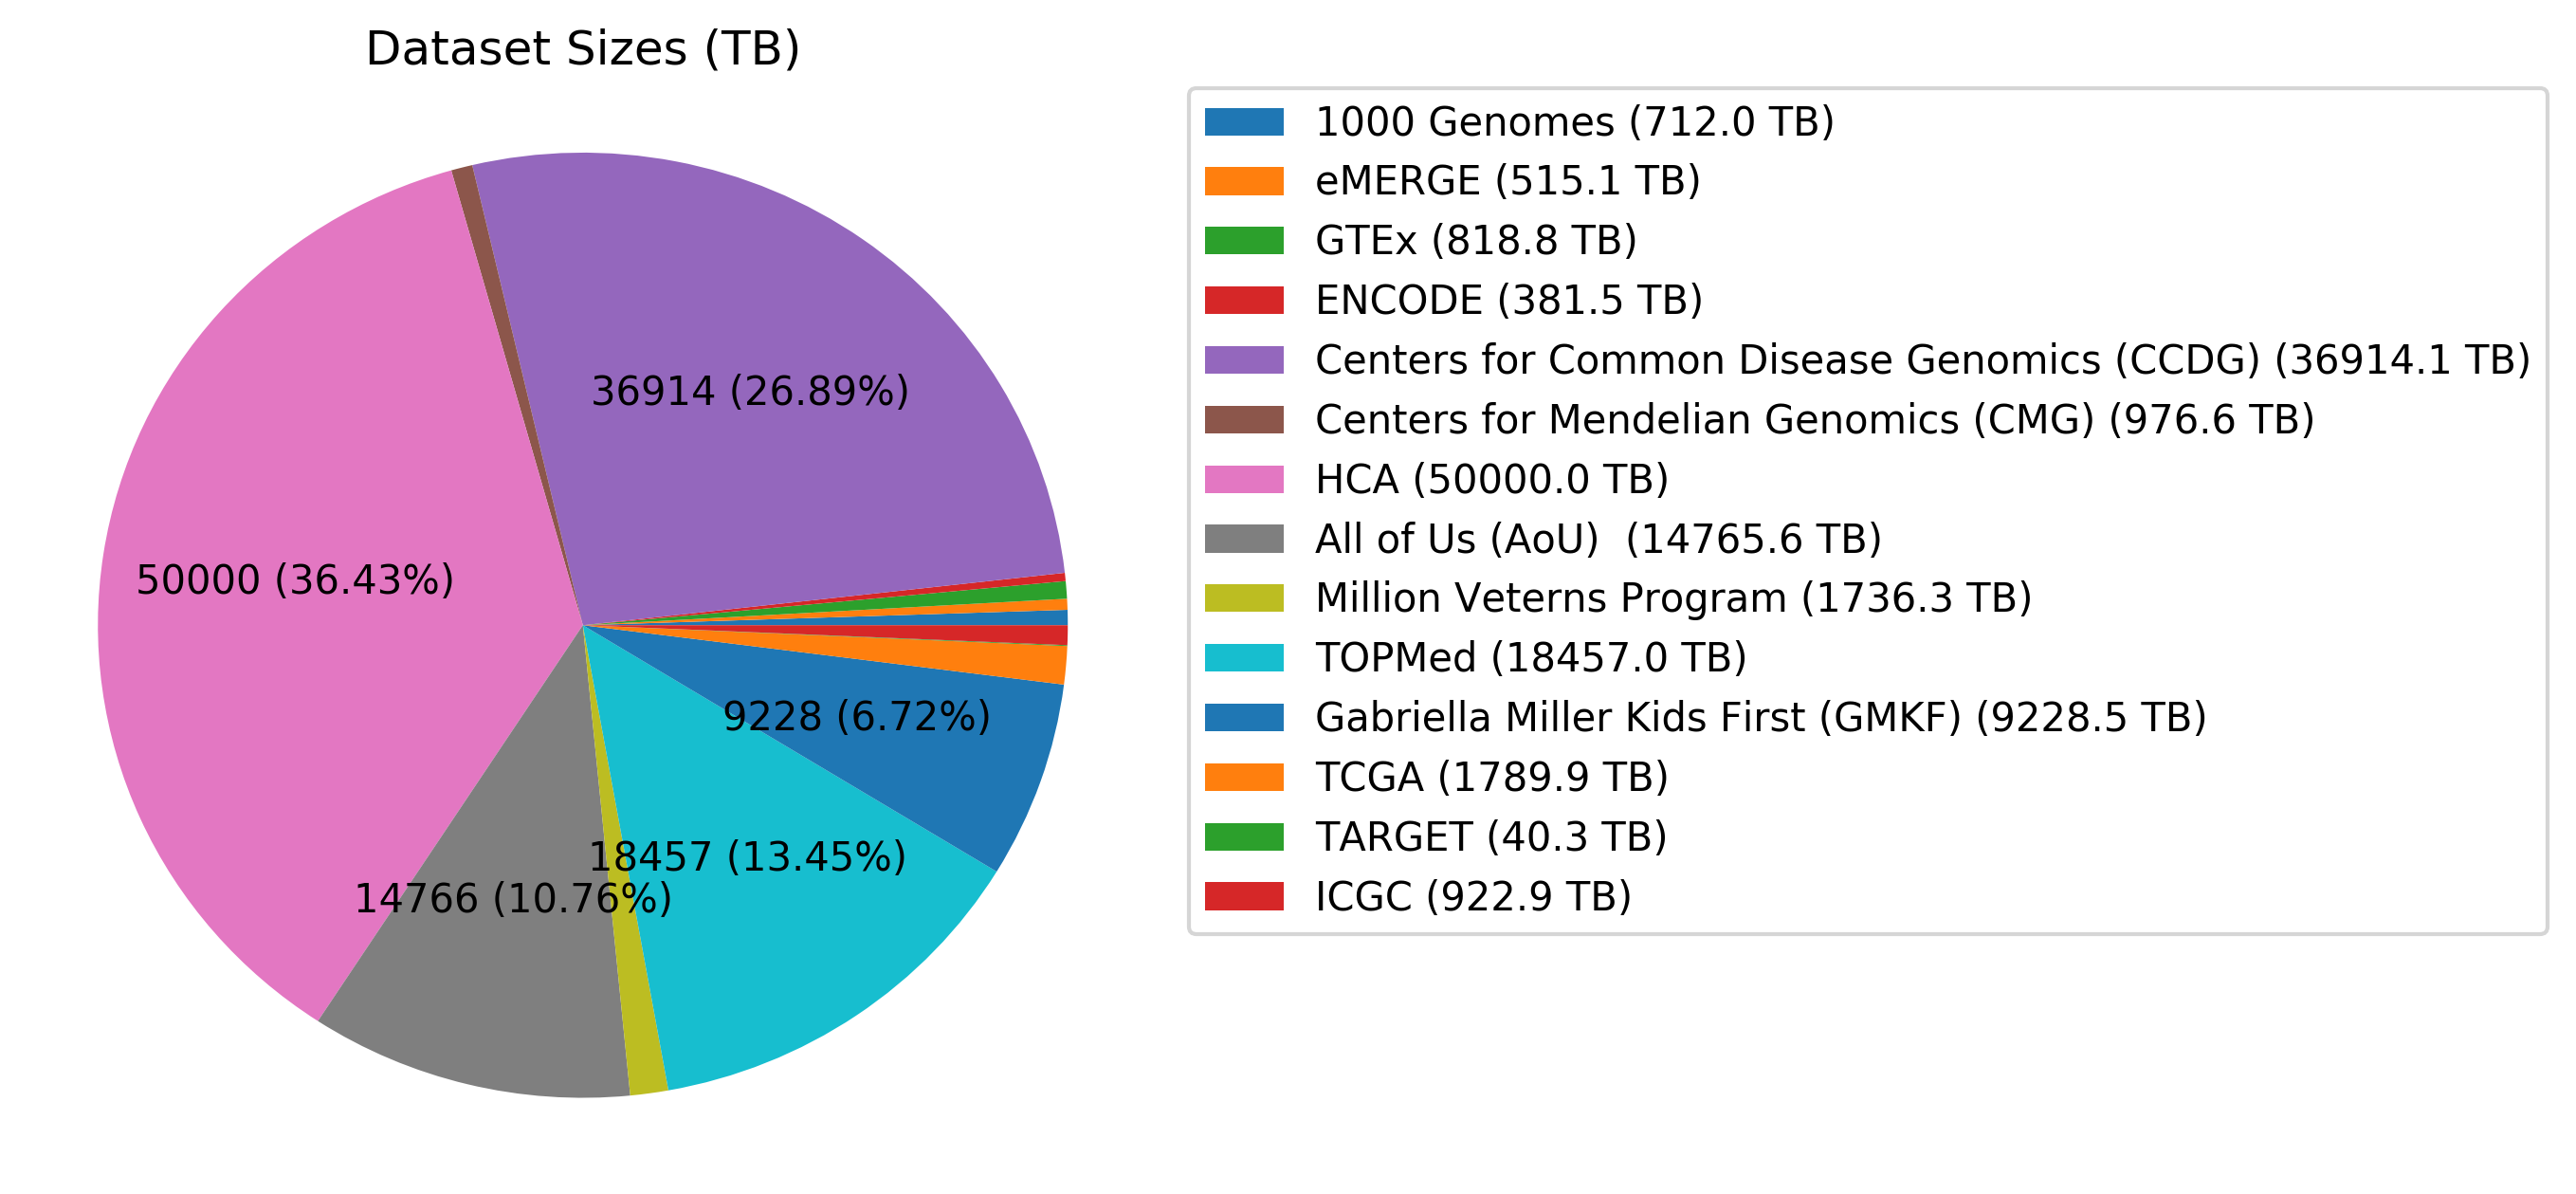

In [83]:
# now work on piechart for dataset sizes

def make_autopct(values):
    def my_autopct(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        if (pct < 6):
            return ''
        else:
            return '{v:d} ({p:.2f}%)'.format(p=pct,v=val)
    return my_autopct

plt.figure(num=2, figsize=(5, 5), dpi=300)

tb_data = data['Dataset Size TB'].values
print (projects)
print (tb_data)
labels_with_size = list(map(lambda x, y: str(x)+' ('+str(y)+' TB)', list(projects), list(tb_data)))

plt.subplot(1, 1, 1)

plt.pie(tb_data, labels=None, autopct=make_autopct(tb_data), radius=1.1)
plt.title(textwrap.fill("Dataset Sizes (TB)", 25))
plt.legend(labels=labels_with_size, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)